Date: 09.04.2023

Author: Reto Hendry

This notebook is to test the reversal of the resampled and flattened np array. It should also mark the most relevant feature. 

## import libs and define functions

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [114]:
def plot_3d_array_colored(array, marked_indices=None):
    # Create a 3D figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Create a colormap
    cmap = plt.get_cmap('viridis')

    # Normalize the array values to fit the colormap range
    norm = plt.Normalize(array.min(), array.max())

    # Create a boolean mask for filled voxels
    filled = np.ones(array.shape, dtype=bool)

    # Plot the voxels using the facecolors and the boolean mask
    facecolors = cmap(norm(array))
    ax.voxels(filled, facecolors=facecolors, edgecolor='k', linewidth=0.5, alpha=0.8)

    # If marked_indices is provided, add separate voxels with different edge colors for marked elements
    if marked_indices is not None:
        for index in marked_indices:
            marked_filled = np.zeros(array.shape, dtype=bool)
            marked_filled[tuple(index)] = True
            ax.voxels(marked_filled, facecolors=facecolors[tuple(index)], edgecolor='r', linewidth=1, alpha=0.8)

    # Set the axis labels
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, shrink=0.8)

    # Show the plot
    plt.show()

In [66]:
def unpad_array(padded_array, padding):
    """
    Unpad a padded array.

    Parameters
    ----------
    padded_array : numpy.ndarray
        The padded array.
    padding : list
        A list of tuples containing the padding values for each dimension.

    Returns
    -------
    original_array : numpy.ndarray
        The original array before padding.
    
    """
    # Initialize an empty list to store the slices for each dimension
    slices = []
    
    # Loop through each dimension's padding values
    for pad in padding:
        start = pad[0]

        if pad[1] > 0:
            stop = -pad[1]
        else:
            stop = None  # slice till the end
        
        slices.append(slice(start, stop))
    
    original_array = padded_array[tuple(slices)]

    return original_array

## padding -> reverse

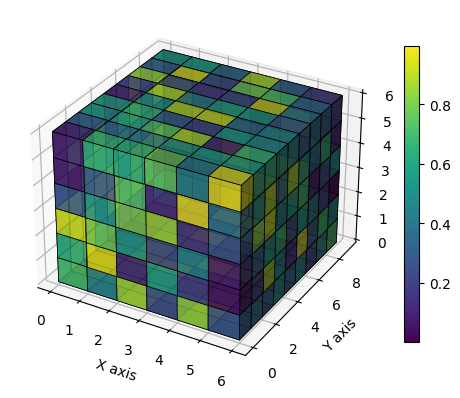

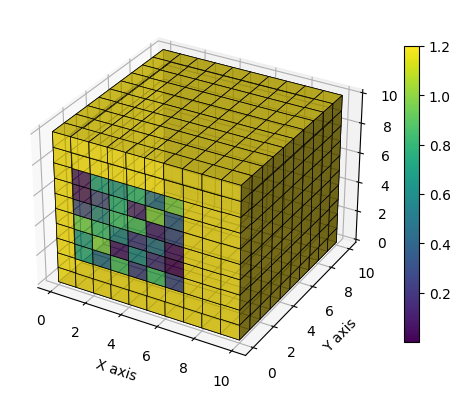

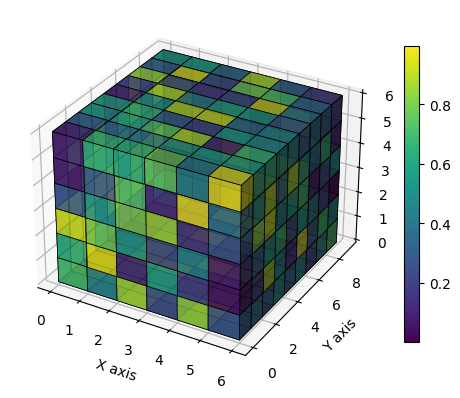

True


In [75]:
# create a padding list
padding = [(1, 3), (0, 1), (2, 2)]

# create a small 3d array of random numbers
small_3d_array = np.random.rand(6, 9, 6)
plot_3d_array_colored(small_3d_array)

# pad the array
padded_small_3d_array = np.pad(small_3d_array, padding, mode="constant", constant_values=1.2)
plot_3d_array_colored(padded_small_3d_array)

# Reverse the padding operation
original_array = unpad_array(padded_small_3d_array, padding)
plot_3d_array_colored(original_array)

# Check if the arrays are equal
print(np.array_equal(small_3d_array, original_array))

## resampling -> reverse

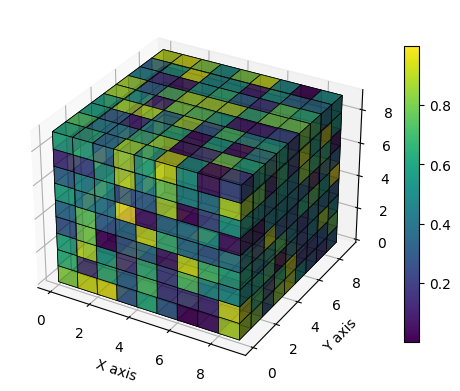

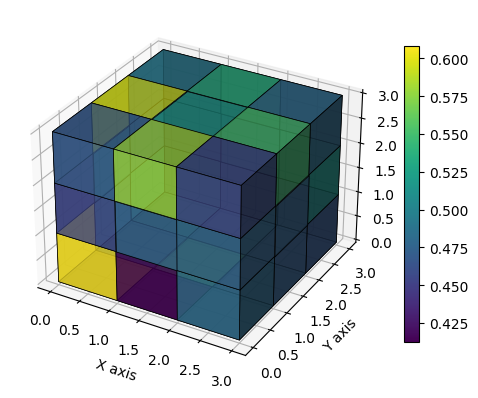

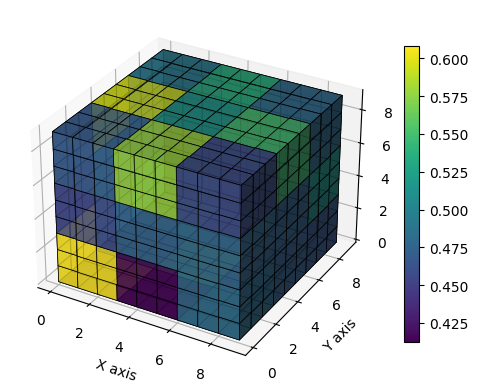

In [76]:
# create a 3d array of random numbers
# the array must be a multiple of the resample_cube since it represents the padded array
resample_cube = (3, 3, 3)
factor = 3
padded_3d_arr = np.random.rand(resample_cube[0] * factor, 
                              resample_cube[1] * factor, 
                              resample_cube[2] * factor)

# plot the array
plot_3d_array_colored(padded_3d_arr)

######################
# resample the array (code from function_resample_4d_array.py)
small_3d_array_size = tuple(int(padded_3d_arr.shape[i] / resample_cube[i]) for i in range(3))

strides = tuple(
    padded_3d_arr.strides[k] * resample_cube[k] for k in range(3)
) + padded_3d_arr.strides
window_view = np.lib.stride_tricks.as_strided(
    padded_3d_arr, shape=small_3d_array_size + resample_cube, strides=strides
)

small_3d_array = np.mean(window_view, axis=(-3, -2, -1))

# plot the array
plot_3d_array_colored(small_3d_array)

######################
# reverse the resampling operation

# Expand the smaller array back to the original shape
expanded_3d_array = (small_3d_array
                     .repeat(resample_cube[0], axis=0)
                     .repeat(resample_cube[1], axis=1)
                     .repeat(resample_cube[2], axis=2)
)

# plot the array
plot_3d_array_colored(expanded_3d_array)


## resampling, reshaping -> reverse

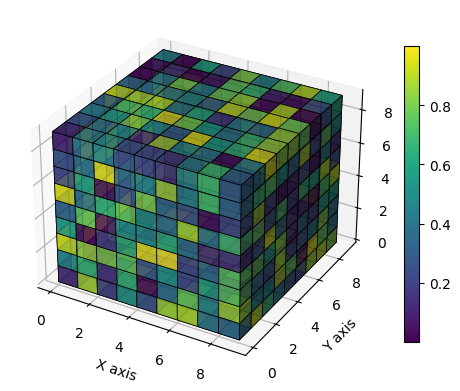

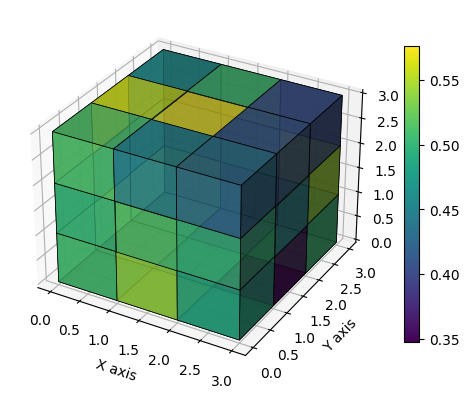

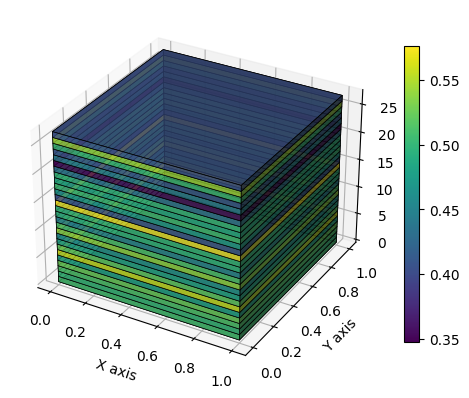

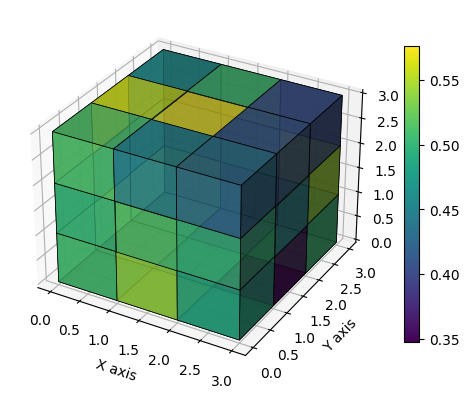

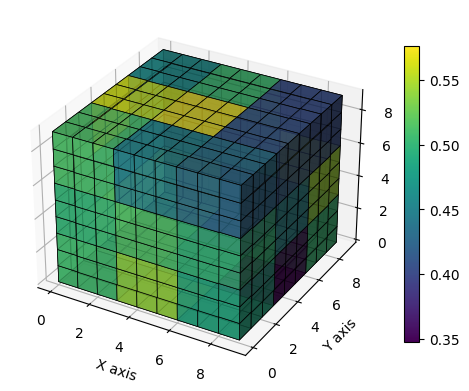

In [77]:
# create a 3d array of random numbers
# the array must be a multiple of the resample_cube since it represents the padded array
resample_cube = (3, 3, 3)
factor = 3
padded_3d_arr = np.random.rand(resample_cube[0] * factor, 
                              resample_cube[1] * factor, 
                              resample_cube[2] * factor)

# plot the array
plot_3d_array_colored(padded_3d_arr)

######################
# resample the array (code from function_resample_4d_array.py)
small_3d_array_size = tuple(int(padded_3d_arr.shape[i] / resample_cube[i]) for i in range(3))

strides = tuple(
    padded_3d_arr.strides[k] * resample_cube[k] for k in range(3)
) + padded_3d_arr.strides
window_view = np.lib.stride_tricks.as_strided(
    padded_3d_arr, shape=small_3d_array_size + resample_cube, strides=strides
)

small_3d_array = np.mean(window_view, axis=(-3, -2, -1))

# plot the array
plot_3d_array_colored(small_3d_array)

######################
# reshape the array (flatten)
flattened_array = small_3d_array.reshape((1, 1, -1))

# plot the array
plot_3d_array_colored(flattened_array)

######################
# reverse the reshape (unflatten)
unflattened_array = flattened_array.reshape(small_3d_array_size)

# plot the array
plot_3d_array_colored(unflattened_array)

######################
# reverse the resampling operation

# Expand the smaller array back to the original shape
expanded_3d_array = (unflattened_array
                     .repeat(resample_cube[0], axis=0)
                     .repeat(resample_cube[1], axis=1)
                     .repeat(resample_cube[2], axis=2)
)

# plot the array
plot_3d_array_colored(expanded_3d_array)

## padding, resampling, reshaping -> reverse

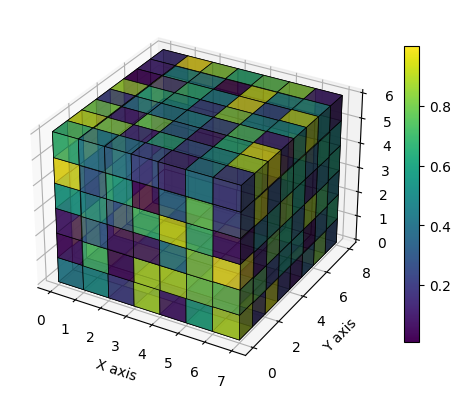

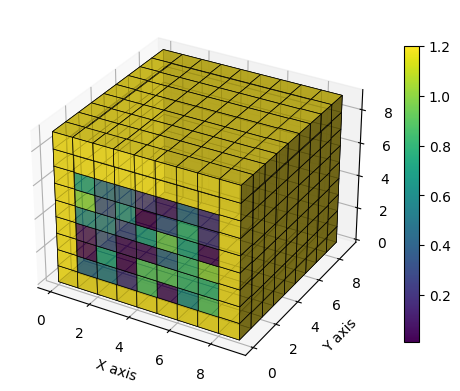

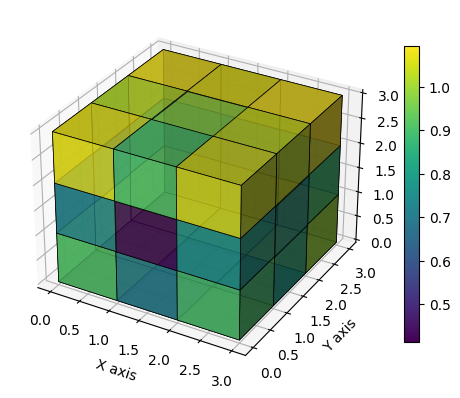

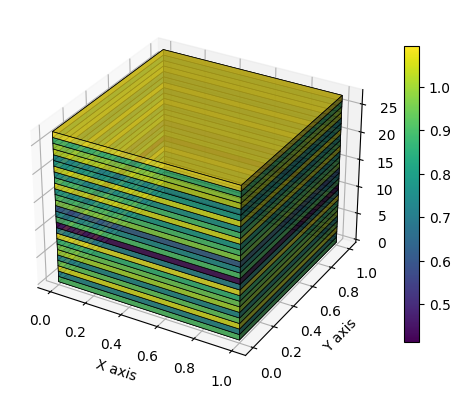

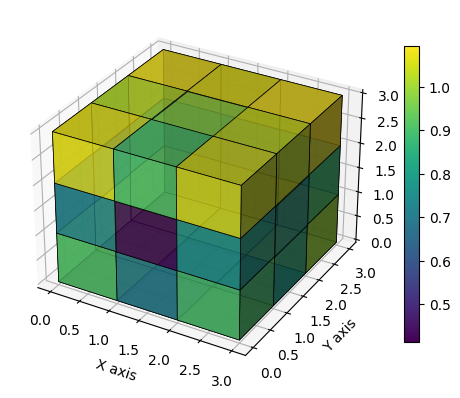

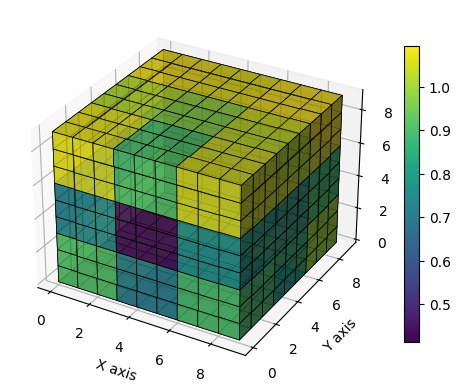

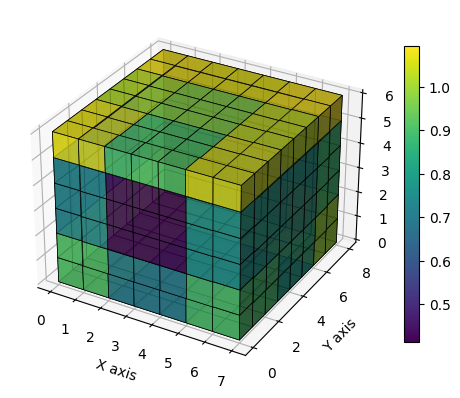

In [78]:
s = 3
resample_cube = (s, s, s)
padding = [(1, 1), (0, 1), (1, 2)]

# create a small 3d array of random numbers
first_small_3d_array = np.random.rand(7, 8, 6)
plot_3d_array_colored(first_small_3d_array)

######################
# pad the array
padded_3d_arr = np.pad(first_small_3d_array, padding, mode="constant", constant_values=1.2)
plot_3d_array_colored(padded_3d_arr)

######################
# resample the array (code from function_resample_4d_array.py)
small_3d_array_size = tuple(int(padded_3d_arr.shape[i] / resample_cube[i]) for i in range(3))

strides = tuple(
    padded_3d_arr.strides[k] * resample_cube[k] for k in range(3)
) + padded_3d_arr.strides
window_view = np.lib.stride_tricks.as_strided(
    padded_3d_arr, shape=small_3d_array_size + resample_cube, strides=strides
)

small_3d_array = np.mean(window_view, axis=(-3, -2, -1))
plot_3d_array_colored(small_3d_array)

######################
# reshape the array (flatten)
flattened_array = small_3d_array.reshape((1, 1, -1))
plot_3d_array_colored(flattened_array)

######################
# reverse the reshape (unflatten)
unflattened_array = flattened_array.reshape(small_3d_array_size)
plot_3d_array_colored(unflattened_array)

######################
# reverse the resampling operation

# Expand the smaller array back to the original shape
expanded_3d_array = (unflattened_array
                     .repeat(resample_cube[0], axis=0)
                     .repeat(resample_cube[1], axis=1)
                     .repeat(resample_cube[2], axis=2)
)
plot_3d_array_colored(expanded_3d_array)

######################
# Reverse the padding operation
original_array = unpad_array(expanded_3d_array, padding)
plot_3d_array_colored(original_array)

In [101]:
indexes

array([[0, 0, 2],
       [0, 1, 1]])

## + visualize features

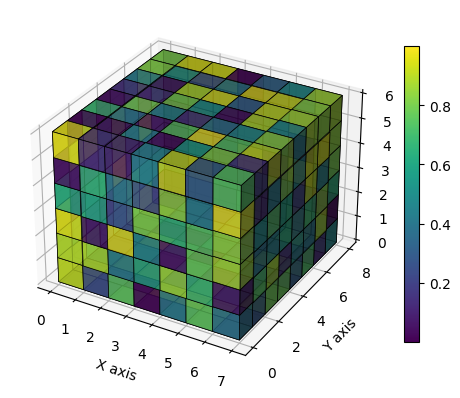

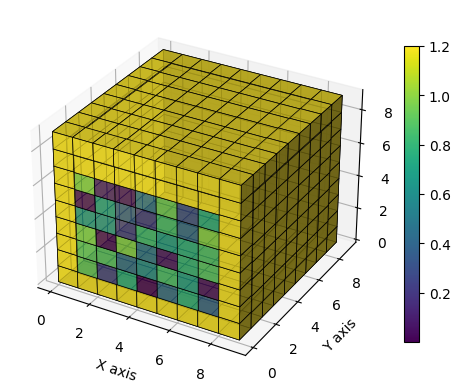

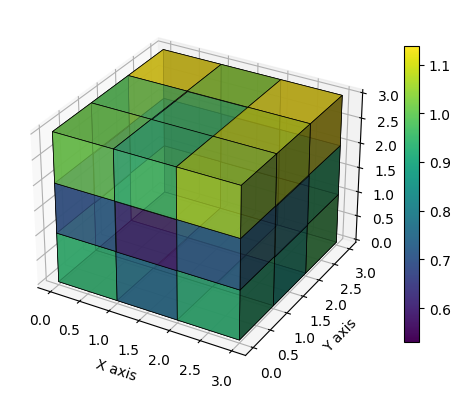

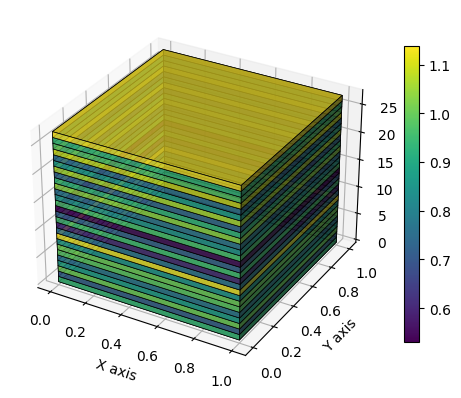

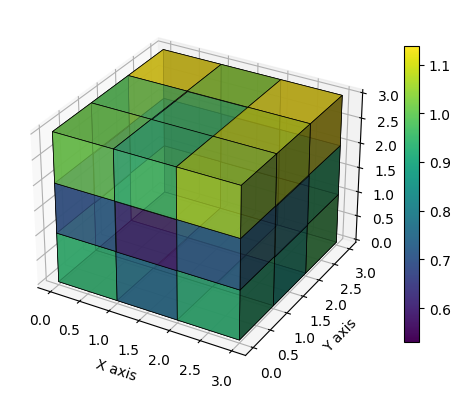

[[0 0 2]
 [0 2 2]
 [2 1 0]]


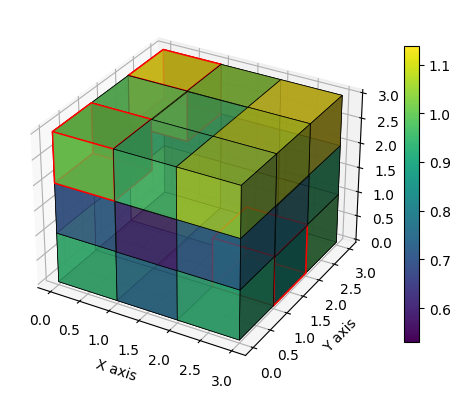

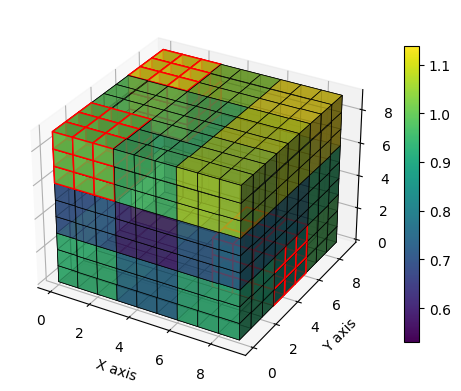

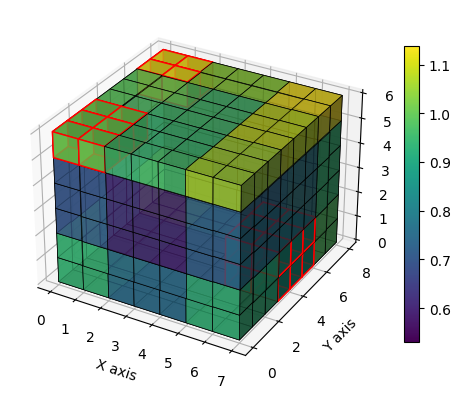

In [117]:
s = 3
resample_cube = (s, s, s)
padding = [(1, 1), (0, 1), (1, 2)]

# create a small 3d array of random numbers
first_small_3d_array = np.random.rand(7, 8, 6)
plot_3d_array_colored(first_small_3d_array)

######################
# pad the array
padded_3d_arr = np.pad(first_small_3d_array, padding, mode="constant", constant_values=1.2)
plot_3d_array_colored(padded_3d_arr)

######################
# resample the array (code from function_resample_4d_array.py)
small_3d_array_size = tuple(int(padded_3d_arr.shape[i] / resample_cube[i]) for i in range(3))

strides = tuple(
    padded_3d_arr.strides[k] * resample_cube[k] for k in range(3)
) + padded_3d_arr.strides
window_view = np.lib.stride_tricks.as_strided(
    padded_3d_arr, shape=small_3d_array_size + resample_cube, strides=strides
)

small_3d_array = np.mean(window_view, axis=(-3, -2, -1))
plot_3d_array_colored(small_3d_array)

######################
# reshape the array (flatten)
flattened_array = small_3d_array.reshape((1, 1, -1))
plot_3d_array_colored(flattened_array)

######################
# reverse the reshape (unflatten)
unflattened_array = flattened_array.reshape(small_3d_array_size)
plot_3d_array_colored(unflattened_array)

######################
# Find the indices of the important elements in the flattened array
marker_array = unflattened_array.copy()
marker_value = 1
important_indices_flattened = [2, 8, 21]
important_indices_3d = [np.unravel_index(index, unflattened_array.shape) for index in important_indices_flattened]
for indx in important_indices_3d:
    marker_array[indx] = True
indices = np.argwhere(marker_array == True)
print(indices)
plot_3d_array_colored(unflattened_array, marked_indices=indices)

######################
# reverse the resampling operation

# Expand the smaller array back to the original shape
expanded_3d_array = (unflattened_array
                     .repeat(resample_cube[0], axis=0)
                     .repeat(resample_cube[1], axis=1)
                     .repeat(resample_cube[2], axis=2)
)
expanded_marker_array = (marker_array
                        .repeat(resample_cube[0], axis=0)
                        .repeat(resample_cube[1], axis=1)
                        .repeat(resample_cube[2], axis=2)
)
plot_3d_array_colored(expanded_3d_array, np.argwhere(expanded_marker_array == True))

######################
# Reverse the padding operation
original_array = unpad_array(expanded_3d_array, padding)
original_marker_array = unpad_array(expanded_marker_array, padding)
plot_3d_array_colored(original_array, np.argwhere(original_marker_array == True))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# create a 4d array which represents (sample, x, y, z)
# the shape should be (2, 6, 4, 2) so it is basically two samples with a volume of 6x4x2
# the values should increase by 1 starting from 0
sample_array_4d = np.arange(0, 48, 1, dtype=int).reshape(2, 6, 4, 2)

# do a 3d plot of the first sample, the color should be the value of the element in the array


Original array and reshaped array are equal: True


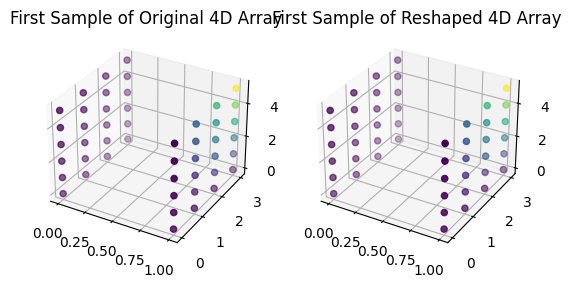

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Flatten the 4D array into a 2D array
def flatten_array(array):
    return array.reshape(array.shape[0], -1)

# Reshape the 2D array back to the original 4D shape
def reshape_to_original(array_2d, original_shape):
    return array_2d.reshape(original_shape)

# Create a 4D array (2 samples, each of shape 6x4x2)
array = np.array([[[[i * j * k for i in range(6)] for j in range(4)] for k in range(2)] for _ in range(2)])

# Flatten the 4D array into a 2D array
original_shape = array.shape
array_2d = flatten_array(array)

# Reshape the 2D array back to the original 4D shape
array_reversed = reshape_to_original(array_2d, original_shape)

# Check if the original array and the reshaped array are equal
print("Original array and reshaped array are equal:", np.array_equal(array, array_reversed))

# Plot the first sample of the original 4D array
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
x, y, z = np.meshgrid(np.arange(array.shape[1]), np.arange(array.shape[2]), np.arange(array.shape[3]), indexing='ij')
ax.scatter(x, y, z, c=array[0].flatten(), marker='o', cmap='viridis')
ax.set_title("First Sample of Original 4D Array")

# Plot the first sample of the reshaped 4D array
ax2 = fig.add_subplot(122, projection='3d')
x2, y2, z2 = np.meshgrid(np.arange(array_reversed.shape[1]), np.arange(array_reversed.shape[2]), np.arange(array_reversed.shape[3]), indexing='ij')
ax2.scatter(x2, y2, z2, c=array_reversed[0].flatten(), marker='o', cmap='viridis')
ax2.set_title("First Sample of Reshaped 4D Array")

plt.show()


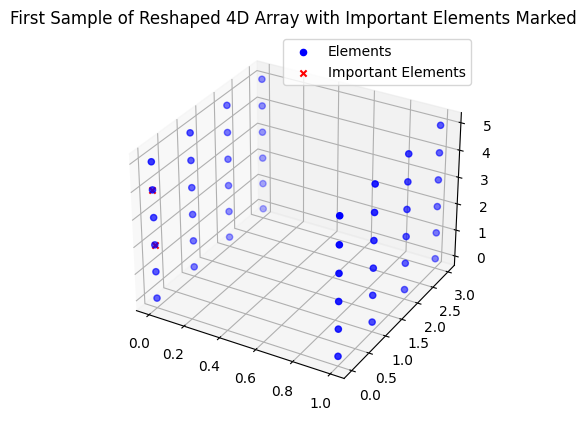

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Flatten the 4D array into a 2D array
def flatten_array(array):
    return array.reshape(array.shape[0], -1)

# Reshape the 2D array back to the original 4D shape
def reshape_to_original(array_2d, original_shape):
    return array_2d.reshape(original_shape)

# Create a 4D array (2 samples, each of shape 6x4x2)
array = np.array([[[[i * j * k for i in range(6)] for j in range(4)] for k in range(2)] for _ in range(2)])

# Flatten the 4D array into a 2D array
original_shape = array.shape
array_2d = flatten_array(array)

# Reshape the 2D array back to the original 4D shape
array_reversed = reshape_to_original(array_2d, original_shape)

# Find the indices of the important elements (3rd and 5th) in the flattened array
important_indices_flattened = [2, 4]
important_indices_4d = [np.unravel_index(index, array_reversed[0].shape) for index in important_indices_flattened]

# Plot the first sample of the reshaped 4D array, marking the important elements with an 'X'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = np.meshgrid(np.arange(array_reversed.shape[1]), np.arange(array_reversed.shape[2]), np.arange(array_reversed.shape[3]), indexing='ij')

# Plot all elements in blue
ax.scatter(x, y, z, c='b', marker='o', label='Elements')

# Plot important elements in red
for index in important_indices_4d:
    ax.scatter(index[0], index[1], index[2], c='r', marker='x', label='Important Elements')

# Remove duplicate labels
handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
ax.legend(*zip(*unique), loc='best')

ax.set_title("First Sample of Reshaped 4D Array with Important Elements Marked")

plt.show()
